# 2º Notebook - Analises Exploratória

Este notebook servirá para fazer uma análise exploratória dos dados brutos que puxamos no 1º Notebook. É verdade que temos os arquivos Analises.xlsx (Excel) e Relatorio.pbix (Power BI), que também servem de complemento na análise exploratória dos dados. Neste notebook, apenas colocamos análises que possam ser feitas com o Python. A ideia é mostrar que tanto no Power BI, como no Excel ou no Python, pode-se fazer esta análise. Claro, algumas funcionalidades em Python são mais rápidas, outras no Excel, outras no Power BI. Por exemplo, no Excel e no Power BI não há o gráfico para a matriz de correlação, portanto, no Python ela fica mais rápida tanto para calcular a correlação quanto para plotar a matriz de calor.

Por outro lado, no Excel a formatação e personalização dos gráficos é mais intuitiva, podendo mexer em pontos únicos com maior facilidade. No Power BI, há a interação dos gráficos, como no caso de dashboards, onde cada gráfico se interage. Ou seja, as análises estão nestes arquivos apenas para mostrar que em ambas as ferramentas pode-se realizar uma Análise Descritiva dos dados.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# configurando o pandas
pd.set_option('display.max_columns', None)

## 1. Analises da Carteira do IBOV

No notebook de criação dos dados, coletamos os ativos que compõem a carteira do IBOV. Por meio de web scraping, extraímos algumas informações como setores, segmentos, tamanho de mercado e outras variáveis.

Com o Excel, utilizamos a análise univariada e estatísticas descritivas para criar novas variáveis. Por exemplo, a variável `Tempo em Bolsa` representa *Ano Atual - Ano do IPO*. Esse dado é interessante para avaliar há quanto tempo a empresa está presente na bolsa. No entanto, percebemos que seriam necessárias mais informações. Assim, com base na análise da distribuição dessa variável (utilizando histograma, boxplot e outras medidas), criamos uma nova variável categórica chamada *"EmpresaIPO"*. Essa variável classifica as empresas da seguinte forma:  
- Menos de 10 anos: *Recente*  
- Entre 10 e 20 anos: *Normal*  
- Mais de 20 anos: *Consolidada*  

Essa categorização só foi possível após observarmos a distribuição dos dados de tempo em bolsa, com o Excel, mas esta variavel *"EmpresaIPO"* foi criada no Power BI para os gráficos. 

No Power BI, aplicamos análise multivariada e uma visão geral dos dados. Isso é possível porque os gráficos no Power BI são interativos entre si. Por exemplo, no dashboard de visão geral, podemos criar uma tabela por setor e segmento para verificar o peso de participação de cada um. Em outra tabela, podemos listar os ativos. Ao clicar em um setor, o próprio Power BI filtra automaticamente os ativos daquele setor, tornando a análise bastante intuitiva.

Agora, neste notebook, especificamente nesta seção, vamos utilizar a linguagem Python para analisar correlações, gerar alguns gráficos e realizar também análises descritivas. A ideia é apresentar informações que não estão disponíveis no Power BI ou no Excel, como por exemplo a matriz de correlação.


In [3]:
# Importando os dados
df = pd.read_csv('data/scraping_ativos.csv', encoding='ISO-8859-1')

In [4]:
# Visualizando 
display(df)

,Ativo,Ano Fundacao,Ano IPO,Valor Mercado,Setor,Segmento,Idade,Tempo em Bolsa,Peso Participacao
0,VALE3,1943,1970,223954633000,Materiais Básicos,Minerais Metálicos,82,55,11.595
1,ITUB4,1943,2002,313335024000,Financeiro,Bancos,82,23,7.925
2,PETR4,1953,1977,426601191000,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",72,48,7.884
3,PETR3,1953,1977,426601191000,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",72,48,4.409
4,ELET3,1962,1971,98986984000,Utilidade Pública,Energia Elétrica,63,54,3.862
...,...,...,...,...,...,...,...,...,...
82,PETZ3,2013,2020,1776090000,Consumo não Cíclico,Produtos Diversos,12,5,0.058
83,CVCB3,2009,2013,1035414000,Consumo Cíclico,Viagens e Turismo,16,12,0.053
84,AZUL4,2008,2017,986716000,Bens Industriais,Transporte Aéreo,17,8,0.051
85,LWSA3,1997,2020,1502906000,Tecnologia da Informação,Programas e Serviços,28,5,0.050


In [5]:
# Criando as categorizações do Power BI, com base nas analises do Excel

# Bins ou critérios para os grupos
bins = [0, 10, 20, float('inf')]

# Os grupos criados
labels = ['Recente', 'Normal', 'Consolidada']

# Criando a variavel 'EmpresaIPO' mencionada como exemplo acima
df['EmpresaIPO'] = pd.cut(df['Tempo em Bolsa'], bins=bins, labels=labels, right=False)

# Visualizando as alterações
display(df)

,Ativo,Ano Fundacao,Ano IPO,Valor Mercado,Setor,Segmento,Idade,Tempo em Bolsa,Peso Participacao,EmpresaIPO
0,VALE3,1943,1970,223954633000,Materiais Básicos,Minerais Metálicos,82,55,11.595,Consolidada
1,ITUB4,1943,2002,313335024000,Financeiro,Bancos,82,23,7.925,Consolidada
2,PETR4,1953,1977,426601191000,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",72,48,7.884,Consolidada
3,PETR3,1953,1977,426601191000,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",72,48,4.409,Consolidada
4,ELET3,1962,1971,98986984000,Utilidade Pública,Energia Elétrica,63,54,3.862,Consolidada
...,...,...,...,...,...,...,...,...,...,...
82,PETZ3,2013,2020,1776090000,Consumo não Cíclico,Produtos Diversos,12,5,0.058,Recente
83,CVCB3,2009,2013,1035414000,Consumo Cíclico,Viagens e Turismo,16,12,0.053,Normal
84,AZUL4,2008,2017,986716000,Bens Industriais,Transporte Aéreo,17,8,0.051,Recente
85,LWSA3,1997,2020,1502906000,Tecnologia da Informação,Programas e Serviços,28,5,0.050,Recente


In [6]:
# Outra categorização é o tamanho da empresa, novamente criada no Power BI, com base nas analises do Excel

# Bins ou critérios para os grupos
bins = [0, 12e9, 100e9, float('inf')]

# Os grupos criados
labels = ['Small Caps', 'Mid Caps', 'Large Caps']

# Criando a variavel 'EmpresaIPO' mencionada como exemplo acima
df['ClassEmpresa'] = pd.cut(df['Valor Mercado'], bins=bins, labels=labels, right=False)

# Visualizando as alterações
display(df)

,Ativo,Ano Fundacao,Ano IPO,Valor Mercado,Setor,Segmento,Idade,Tempo em Bolsa,Peso Participacao,EmpresaIPO,ClassEmpresa
0,VALE3,1943,1970,223954633000,Materiais Básicos,Minerais Metálicos,82,55,11.595,Consolidada,Large Caps
1,ITUB4,1943,2002,313335024000,Financeiro,Bancos,82,23,7.925,Consolidada,Large Caps
2,PETR4,1953,1977,426601191000,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",72,48,7.884,Consolidada,Large Caps
3,PETR3,1953,1977,426601191000,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",72,48,4.409,Consolidada,Large Caps
4,ELET3,1962,1971,98986984000,Utilidade Pública,Energia Elétrica,63,54,3.862,Consolidada,Mid Caps
...,...,...,...,...,...,...,...,...,...,...,...
82,PETZ3,2013,2020,1776090000,Consumo não Cíclico,Produtos Diversos,12,5,0.058,Recente,Small Caps
83,CVCB3,2009,2013,1035414000,Consumo Cíclico,Viagens e Turismo,16,12,0.053,Normal,Small Caps
84,AZUL4,2008,2017,986716000,Bens Industriais,Transporte Aéreo,17,8,0.051,Recente,Small Caps
85,LWSA3,1997,2020,1502906000,Tecnologia da Informação,Programas e Serviços,28,5,0.050,Recente,Small Caps


**Comentários**

Com as análises do Excel (Analises.xlsx) e do Power BI (Relatorio.pbix) sobre as variáveis `'Valor Mercado', 'Idade', 'Tempo em Bolsa', 'Peso Participacao'`, pode-se criar as variáveis categóricas acima, onde realizou-se um pouco de *feature engineering*, podendo resumir e olhar de forma mais clara os dados. Como foi feito? Abaixo temos a chamada **análise univariada**, olhando somente para a variável `Tamanho de Mercado`. No arquivo Excel, plotamos estas informações:

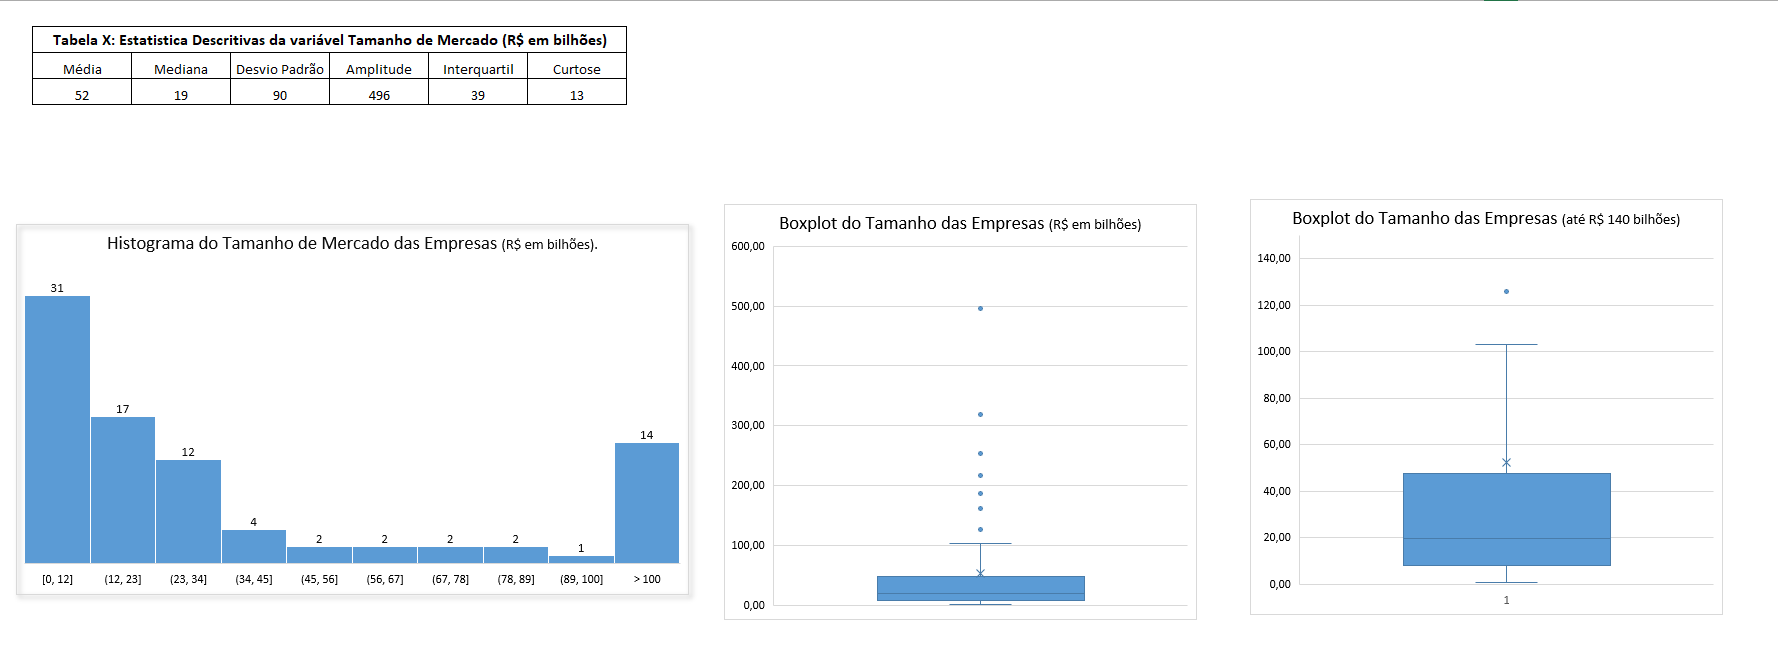

Note que temos uma tabela que contém as medidas descritivas como média, mediana, a variabilidade dos dados com desvio padrão, amplitude e o intervalo interquartil, e com a curtose podemos observar se os dados seguem alguma distribuição. Podemos observar que temos outliers, ou seja, existem empresas que são gigantes como a Petrobras e a Vale3. É por este motivo que nota-se uma diferença entre a média e a mediana, e a curtose ter um valor considerado alto. Portanto, olhando para o histograma e o boxplot, criou-se a variável `ClassEmpresa` acima.

Esta foi uma das formas de realizar a análise univariada para a realização da *feature engineering*.

Agora, abaixo, vamos realizar uma análise bidimensional, qual a correlação das variáveis numéricas e tirar algumas hipóteses.

In [7]:
# Selecionando as variaveis numericas
df_corr = df[['Valor Mercado', 'Idade', 'Tempo em Bolsa', 'Peso Participacao']]

# Correlação de Pearson
df_corr = df_corr.corr().round(4)

# Visualizando as correlações
display(df_corr)

,Valor Mercado,Idade,Tempo em Bolsa,Peso Participacao
Valor Mercado,1.0000,0.3024,0.3070,0.8117
Idade,0.3024,1.0000,0.5908,0.3248
Tempo em Bolsa,0.3070,0.5908,1.0000,0.3211
Peso Participacao,0.8117,0.3248,0.3211,1.0000


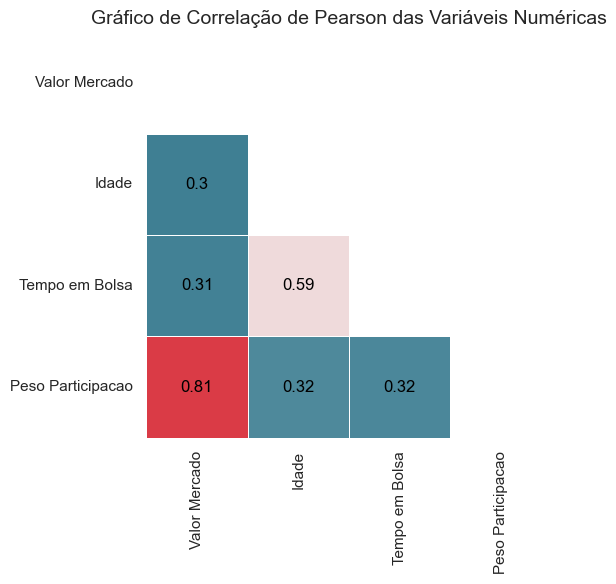

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Setando o estilo do gráfico
sns.set_theme(style="white")

# Gera a máscara para o triângulo superior
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Tamanho da figura
f, ax = plt.subplots(figsize=(12, 6))

# Paleta de cores mais contrastante
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plotando o gráfico de correlação
sns.heatmap(
    df_corr,
    mask=mask,
    cmap=cmap,
    annot=True,
    annot_kws={"color": "black"},  # Anotações em preto
    square=True,
    linewidths=.5,
    cbar=False
)

ax.set_title("Gráfico de Correlação de Pearson das Variáveis Numéricas", fontsize=14)

plt.tight_layout()
plt.show()


**Comentários**

Olhando para as variáveis numéricas, inclusive a variável principal como `Peso Participacao`, podemos observar alguns comportamentos. Mas primeiro, por que a variável `Peso Participacao` é considerada como principal, ou em projetos de machine learning seria chamada de *target*? Porque é exatamente nesta variável que vamos atuar. Lembrando que a Teoria de Markowitz tenta achar o melhor ponderamento entre os ativos na carteira, portanto, verificar como esta variável se comporta com outras variáveis é de suma importância. Lembrando que correlação não implica causalidade, logo, aqui a correlação pode nos dar indícios de alguns comportamentos.

Visualmente, já encontramos a maior correlação: `Peso de Participação` com o `Valor de Mercado`, logo, há indícios de que a carteira do IBOV prioriza, em sua composição, ativos que tenham um grande valor de mercado. Podemos ver, por exemplo, que as maiores empresas do Brasil (Vale, Petrobras e Itaú) possuem, somente essas três, quase um terço de representação no IBOV. Se colocarmos todas as *Large Caps*, chega a um pouco mais de 50% de participação (imagem abaixo retirada do Power BI); então, há evidências de que a carteira do Ibovespa prioriza empresas com grande valor de mercado.

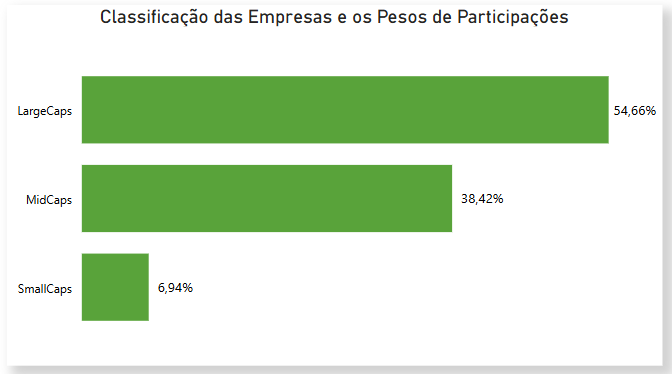

Por outro lado, com respeito às variáveis `Idade` (Fundação da Empresa) e `Tempo em Bolsa` (Data do IPO), podemos notar que a correlação é considerada fraca, em alguns casos considerada até como moderada em relação às variáveis `Peso Participacao` e `Valor de Mercado`, o que dá indícios de que o Ibovespa não prioriza empresas consideradas consolidadas, e que o tamanho da empresa não está fortemente ligado com o tempo de fundação ou tempo em bolsa. E a correlação entre elas é considerada forte, afinal, uma empresa que tem bastantes anos de fundação provavelmente terá maior tempo em bolsa, embora não tenha uma correlação tão forte assim.

Ou seja, em resumo, temos indícios para algumas respostas: ao que parece, a carteira do Ibovespa prioriza ativos que tenham maiores valores de mercado; empresas que têm bastante tempo de bolsa ou de fundação não significam necessariamente que serão as maiores do mercado, e esse tempo de fundação e de IPO não é tão priorizado no Ibovespa.


In [9]:
# Passando a copia do composicao do ibov para outro dataframe
df_participacao = df.copy()

In [10]:
# Salvando as alterações
df_participacao.to_csv('data/participacao_ativos.csv', encoding='ISO-8859-1', index=False)

# 2. Cotação dos Ativos

In [11]:
# Importando os dados
df = pd.read_csv('data/cotacao_ativos.csv', encoding='ISO-8859-1')

# Convertendo a coluna do tipo data
df['Date'] = pd.to_datetime(df['Date'])

# Criando um coluna de ano e mes, e depois junto de mes e ano
df['Ano'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Mes_Ano'] = df['Date'].dt.to_period('M')

df = df.merge(df_participacao[['Ativo', 'Peso Participacao']], on='Ativo')

# Visualizando
display(df)

,Date,Cotacao,Ativo,Percentual,Ano,Mes,Mes_Ano,Peso Participacao
0,2000-01-04,1.48,VALE3,0.0270,2000,1,2000-01,11.595
1,2000-01-05,1.48,VALE3,0.0000,2000,1,2000-01,11.595
2,2000-01-06,1.48,VALE3,0.0000,2000,1,2000-01,11.595
3,2000-01-07,1.54,VALE3,-0.0390,2000,1,2000-01,11.595
4,2000-01-10,1.66,VALE3,-0.0723,2000,1,2000-01,11.595
...,...,...,...,...,...,...,...,...
363524,2025-04-03,0.26,AMOB3,0.0000,2025,4,2025-04,0.006
363525,2025-04-04,0.25,AMOB3,0.0400,2025,4,2025-04,0.006
363526,2025-04-07,0.25,AMOB3,0.0000,2025,4,2025-04,0.006
363527,2025-04-08,0.24,AMOB3,0.0417,2025,4,2025-04,0.006


In [12]:
# Agrupando por Ano e Ativo, pegando o valor único do peso de participacao (ex: primeiro valor)
peso_ano_ativo = df.groupby(['Ano', 'Ativo'])['Peso Participacao'].first().reset_index()

# Calculando o total por ano (soma dos pesos dos ativos no ano)
peso_total_ano = peso_ano_ativo.groupby('Ano')['Peso Participacao'].sum().reset_index()
peso_total_ano.columns = ['Ano', 'Peso_Total_Ano']

# Juntando os dois para ver o peso de cada ativo e o total do ano
resultado = peso_ano_ativo.merge(peso_total_ano, on='Ano')

# Ordenando por ano e peso decrescente
resultado = resultado.sort_values(by=['Ano', 'Peso Participacao'], ascending=[True, False])

# Colocando em dataframe
resultado = pd.DataFrame(resultado)

# Visualizando
display(resultado)

,Ano,Ativo,Peso Participacao,Peso_Total_Ano
26,2000,VALE3,11.595,62.767
17,2000,ITUB4,7.925,62.767
21,2000,PETR4,7.884,62.767
20,2000,PETR3,4.409,62.767
11,2000,ELET3,3.862,62.767
...,...,...,...,...
1520,2025,PETZ3,0.058,100.000
1488,2025,CVCB3,0.053,100.000
1466,2025,AZUL4,0.051,100.000
1511,2025,LWSA3,0.050,100.000


In [13]:
# verificando a quantidade de ativo por ano
ativos_por_ano = resultado.groupby(['Ano', 'Peso_Total_Ano'])['Ativo'].nunique().reset_index()
ativos_por_ano.columns = ['Ano', 'Peso_Total_Ano', 'Total_Ativos']

# verificando os ativos, nome dos ativos
ativos_lista_por_ano = resultado.groupby('Ano')['Ativo'].unique().reset_index()
ativos_lista_por_ano.columns = ['Ano', 'Ativos']

# Novo dataframe resultado para indicar 
resultado = ativos_por_ano.merge(ativos_lista_por_ano, on='Ano')
resultado = pd.DataFrame(resultado)

# Salvando este dataframe para analisar no excel
resultado.to_excel('data/Carteira_IBOV_Por_Ano.xlsx')

display(resultado)

,Ano,Peso_Total_Ano,Total_Ativos,Ativos
0,2000,62.767,29,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
1,2001,62.767,29,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
2,2002,64.684,32,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
3,2003,64.684,32,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
4,2004,66.633,34,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
5,2005,69.284,37,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
6,2006,70.147,38,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
7,2007,78.052,48,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
8,2008,84.108,53,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
9,2009,85.989,57,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."


**Gráfico gerado no Excel (Analise.xlsx / Sheets: Carteira_IBOV_Ano):**

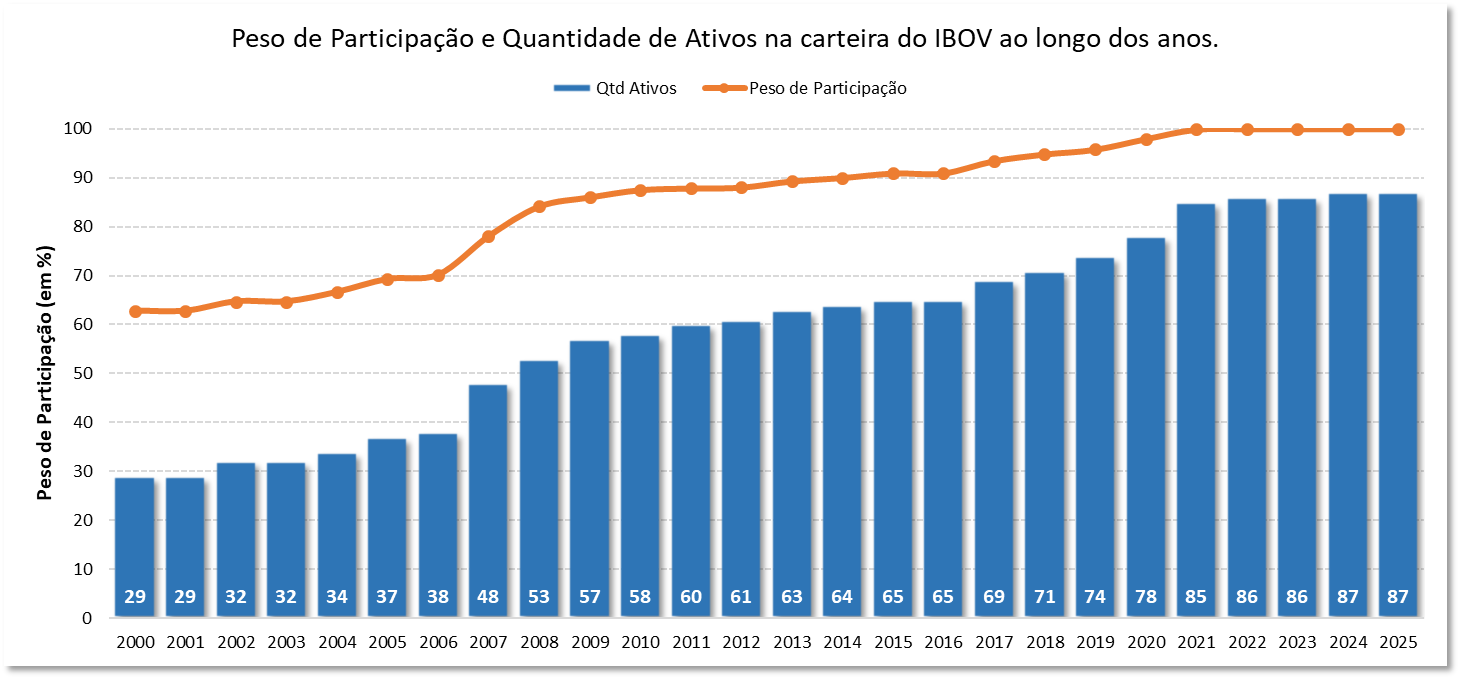

**Antes de tudo:** o *dataframe cotação_ativos.csv* foi gerado a partir da biblioteca `yfinance`, utilizando o maior período disponível. Como resultado, os dados contemplam o intervalo de 2000 até 2025. É importante destacar que, no contexto de investimentos, 25 anos não é considerado um período muito longo para análise histórica. Idealmente, seria desejável trabalhar com uma série temporal mais extensa. No entanto, para fins de estudo, esse intervalo é suficiente. Além disso, com base na visualização gráfica inicial, provavelmente será necessário aplicar novos filtros para delimitar melhor o período de análise.


**O que o gráfico nos mostra**

A partir das barras apresentadas, observa-se que, entre os anos de 2024 e 2025, há a presença da cotação de todos os ativos atuais do IBOV. Isso é confirmado pela linha laranja, que representa 100% de participação da carteira.

Por outro lado, no extremo oposto, no ano de 2000, apenas 29 dos 87 ativos possuem cotações disponíveis. A linha laranja indica que esses 29 ativos representavam pouco mais de 60% da participação total da carteira.

Embora um período mais extenso fosse o ideal, o ano de 2013 parece ser um ponto de equilíbrio interessante. Nessa data, aproximadamente 90% da participação da carteira é contemplada, com 63 dos 87 ativos apresentando dados de cotação.

**O que será feito agora**

Ainda não foi definido um período específico para análise. Com base na quantidade de ativos e sua representatividade, é possível considerar o ano de 2013 em diante. No entanto, para garantir maior confiabilidade nos resultados, é necessário observar outros comportamentos da carteira.

Em teoria, o IBOV se movimenta conforme as ponderações de seus ativos. Por exemplo, considerando que a ação VALE3 possui aproximadamente 11% de participação no índice e apresenta uma valorização de 1,10% em determinado dia, ao ponderar esse retorno com o peso da ação (11% de 1,10%), estima-se que o IBOV tenha subido cerca de 0,12% apenas devido à valorização da VALE3. Portanto, ao calcular a variação percentual individual de cada ativo e ponderá-la com sua respectiva participação no índice, é possível estimar a valorização do IBOV.

Entretanto, é importante destacar que a composição do IBOV é revisada a cada quatro meses, resultando em alterações nos pesos de participação e até mesmo na inclusão ou exclusão de ativos. Dessa forma, é necessário aplicar medidas estatísticas para identificar quais períodos apresentam maior semelhança com a composição atual. Ferramentas como correlação e covariância podem ser utilizadas nesse processo. Além disso, surge uma hipótese interessante: ao longo dos anos, qual período apresenta maior similaridade com a carteira atual? Diversos testes estatísticos poderão ser realizados para investigar essa questão.

A partir disso, o próximo passo será estudar o comportamento da cotação do IBOV em comparação com a cotação dos ativos que o compõem.

Outra decisão que vamos tomar é retirar o ano de 2025, vamos deixar sempre anos fechados para depois ter uma comparação com meses completos.

In [14]:
# import
import yfinance as yf

# Baixando os dados do ibov
ibov = yf.Ticker("^BVSP")

# Baixando os dados desde o ano 2000
df_ibov = ibov.history(start="2000-01-01", end="2025-01-01")

# colocando em Dataframe
df_ibov = pd.DataFrame(df_ibov)

# Tirando a coluna date do indice e colocando como variavel
df_ibov = df_ibov.reset_index()

# Mostrando as primeiras linhas
display(df_ibov)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03 00:00:00-02:00,17098.0,17408.0,16719.0,16930.0,0,0.0,0.0
1,2000-01-04 00:00:00-02:00,16908.0,16908.0,15851.0,15851.0,0,0.0,0.0
2,2000-01-05 00:00:00-02:00,15871.0,16302.0,15350.0,16245.0,0,0.0,0.0
3,2000-01-06 00:00:00-02:00,16237.0,16499.0,15977.0,16107.0,0,0.0,0.0
4,2000-01-07 00:00:00-02:00,16125.0,16449.0,16125.0,16309.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
6186,2024-12-20 00:00:00-03:00,121183.0,122209.0,120700.0,122102.0,18128200,0.0,0.0
6187,2024-12-23 00:00:00-03:00,122105.0,122105.0,120617.0,120767.0,9953300,0.0,0.0
6188,2024-12-26 00:00:00-03:00,120767.0,121612.0,120428.0,121078.0,8338500,0.0,0.0
6189,2024-12-27 00:00:00-03:00,121078.0,121609.0,120252.0,120269.0,8937000,0.0,0.0


In [15]:
# Ajustando os dados do IBOV
df_ibov['Percentual'] = (df_ibov['Close'].shift(1) / df_ibov['Close']) - 1

# Tirando as horas da coluna datetime
df_ibov['Date'] = pd.to_datetime(df_ibov['Date']).dt.date

# Retirando os valores NaN
df_ibov = df_ibov.dropna()

# Visualizando as alterações
display(df_ibov)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Percentual
1,2000-01-04,16908.0,16908.0,15851.0,15851.0,0,0.0,0.0,0.068071
2,2000-01-05,15871.0,16302.0,15350.0,16245.0,0,0.0,0.0,-0.024254
3,2000-01-06,16237.0,16499.0,15977.0,16107.0,0,0.0,0.0,0.008568
4,2000-01-07,16125.0,16449.0,16125.0,16309.0,0,0.0,0.0,-0.012386
5,2000-01-10,16325.0,17057.0,16325.0,17022.0,0,0.0,0.0,-0.041887
...,...,...,...,...,...,...,...,...,...
6186,2024-12-20,121183.0,122209.0,120700.0,122102.0,18128200,0.0,0.0,-0.007486
6187,2024-12-23,122105.0,122105.0,120617.0,120767.0,9953300,0.0,0.0,0.011054
6188,2024-12-26,120767.0,121612.0,120428.0,121078.0,8338500,0.0,0.0,-0.002569
6189,2024-12-27,121078.0,121609.0,120252.0,120269.0,8937000,0.0,0.0,0.006727


In [16]:
# Vendo o df de cotacoes acima precisamos deixar o peso de maneira decimal
df['Peso Participacao'] = df['Peso Participacao'] / 100

# Ponderando o Percentual de cada ativo
df['Percentual Ponderado'] = df['Peso Participacao'] * df['Percentual']

# Retirando os dados de 2025
df = df[df['Date'].dt.year < 2025]

# Visualizando o df de cotacoes
df

,Date,Cotacao,Ativo,Percentual,Ano,Mes,Mes_Ano,Peso Participacao,Percentual Ponderado
0,2000-01-04,1.48,VALE3,0.0270,2000,1,2000-01,0.11595,0.003131
1,2000-01-05,1.48,VALE3,0.0000,2000,1,2000-01,0.11595,0.000000
2,2000-01-06,1.48,VALE3,0.0000,2000,1,2000-01,0.11595,0.000000
3,2000-01-07,1.54,VALE3,-0.0390,2000,1,2000-01,0.11595,-0.004522
4,2000-01-10,1.66,VALE3,-0.0723,2000,1,2000-01,0.11595,-0.008383
...,...,...,...,...,...,...,...,...,...
363456,2024-12-20,0.42,AMOB3,0.1190,2024,12,2024-12,0.00006,0.000007
363457,2024-12-23,0.34,AMOB3,0.2353,2024,12,2024-12,0.00006,0.000014
363458,2024-12-26,0.34,AMOB3,0.0000,2024,12,2024-12,0.00006,0.000000
363459,2024-12-27,0.35,AMOB3,-0.0286,2024,12,2024-12,0.00006,-0.000002


In [17]:
# Aqui vamos simplificar tudo, lá na frente podemos retirar os ativos
df_cotacao_percentuais = df.groupby('Date')['Percentual Ponderado'].sum().reset_index()

# Visualizando o agrupamento
display(df_cotacao_percentuais)

,Date,Percentual Ponderado
0,2000-01-04,0.026017
1,2000-01-05,-0.004741
2,2000-01-06,0.004482
3,2000-01-07,-0.007096
4,2000-01-10,-0.019807
...,...,...
6271,2024-12-20,-0.006140
6272,2024-12-23,0.011122
6273,2024-12-26,0.001471
6274,2024-12-27,0.006554


In [18]:
# Visualizando o tamanho dos dataframes
print(f'Dataframe do IBOV possui {len(df_ibov)} registros')

print(f'Dataframe do total dos ativos ponderados possui {len(df_cotacao_percentuais)} registros')

Dataframe do IBOV possui 6190 registros
Dataframe do total dos ativos ponderados possui 6276 registros


In [19]:
# garantindo que a coluna 'Date' está no formato datetime
df_ibov['Date'] = pd.to_datetime(df_ibov['Date'])
df_cotacao_percentuais['Date'] = pd.to_datetime(df_cotacao_percentuais['Date'])

# Filtrar df_cotacao_percentuais para manter apenas as datas que também existem em df_ibov
df_cotacao_percentuais = df_cotacao_percentuais[df_cotacao_percentuais['Date'].isin(df_ibov['Date'])].copy()

# Juntar os dados para comparacao
df_cotacao_percentuais = df_cotacao_percentuais.merge(df_ibov[['Date', 'Percentual']], on='Date')

# Para percentual vou arredondar até 4 casas decimais
df_cotacao_percentuais[['Percentual Ponderado', 'Percentual']] = df_cotacao_percentuais[['Percentual Ponderado', 'Percentual']].round(4)

# Colocando a coluna ano, para fazer o agrupamento
df_cotacao_percentuais['Ano'] = df_cotacao_percentuais['Date'].dt.year

# Visualizando as alterações
df_cotacao_percentuais

,Date,Percentual Ponderado,Percentual,Ano
0,2000-01-04,0.0260,0.0681,2000
1,2000-01-05,-0.0047,-0.0243,2000
2,2000-01-06,0.0045,0.0086,2000
3,2000-01-07,-0.0071,-0.0124,2000
4,2000-01-10,-0.0198,-0.0419,2000
...,...,...,...,...
6185,2024-12-20,-0.0061,-0.0075,2024
6186,2024-12-23,0.0111,0.0111,2024
6187,2024-12-26,0.0015,-0.0026,2024
6188,2024-12-27,0.0066,0.0067,2024


In [20]:
# Tirando a correlação geral
corr_percentuais = df_cotacao_percentuais[['Percentual Ponderado', 'Percentual']].corr()

print(f'Correlação Geral dos dados')
display(corr_percentuais)

Correlação Geral dos dados


,Percentual Ponderado,Percentual
Percentual Ponderado,1.000000,0.008363
Percentual,0.008363,1.000000


In [21]:
# Pegando as medidas para os anos correspondente
dict_corr = {'Ano': [], 'Correlacao do Ano': [], 'Correlacao ate o Presente': []}

# Funcao para pegar o valor de correlacao entre o Percentual Ponderado e o Percentual do IBOV
def retirando_medidas (df):
    return df.iloc[0, 1]

# Loop para verificar ao longo dos anos
for ano in range(2000, 2025):
    
    # Filtrando os dados em dois tipos: do ano inicial até 2024, e somente o ano inicial
    df_ano_corrido = df_cotacao_percentuais[df_cotacao_percentuais['Ano'] >= ano]
    df_somente_ano = df_cotacao_percentuais[df_cotacao_percentuais['Ano'] == ano]
    
    # Pegando as correlacoes
    corr_ano_corrido = retirando_medidas(df_ano_corrido[['Percentual Ponderado', 'Percentual']].corr())
    corr_somente_ano = retirando_medidas(df_somente_ano[['Percentual Ponderado', 'Percentual']].corr())   
    
    # Passando para o dicionario as informacoes das correlacoes
    dict_corr['Ano'].append(ano)
    dict_corr['Correlacao do Ano'].append(corr_ano_corrido.round(4))
    dict_corr['Correlacao ate o Presente'].append(corr_somente_ano.round(4))

    
# Transformando em Dataframe
correlacoes = pd.DataFrame(dict_corr)


# Visualizando 
display(correlacoes)

,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2000,0.0084,0.0516
1,2001,0.0086,0.8278
2,2002,0.0090,0.8866
3,2003,0.0093,0.0491
4,2004,0.0054,0.9224
5,2005,0.0055,0.0161
6,2006,0.0056,-0.0390
7,2007,0.0057,0.0281
8,2008,0.9620,0.9693
9,2009,0.9636,0.9827


**Observações**

Primeiro vamos deixar claro novamente as variáveis: `Correlacao do Ano`, como o nome já diz, representa a correlação do percentual do IBOV com o percentual ponderado dos ativos somente naquele ano em questão. Por outro lado, `Correlacao até o Presente` leva em conta o ano analisado até o ano de 2024, por isso, às vezes, há uma grande diferença entre as correlações.

Por exemplo, com referência ao ano de 2013, a correlação naquele ano foi de 0,9780 — isso representa uma correlação muito forte. Em contrapartida, de 2013 a 2024 (`Correlacao até o Presente`), a correlação foi de 0,9072, ainda considerada muito forte, ou pelo menos forte, mas note que existe uma diferença entre os valores.

Ainda sobre a correlação, desde 2008 os valores se mantêm entre 0,89 e 0,99, o que significa que são fortemente correlacionados. Ou seja, o percentual da carteira do IBOV e os percentuais dos ativos ponderados seguem a mesma direção. Entre 2011 e 2013, houve uma queda nessa correlação, mas ainda assim permaneceu forte.

Lembrando que, no gráfico anterior (onde plotamos o peso de participação ao longo dos anos e a quantidade de ativos disponíveis), o período de 2013 se mostrava ideal. A correlação confirma que esse também é um período adequado para análise, especialmente a partir de 2014. Porém, com isso, reduzimos bastante o intervalo de análise. Infelizmente, neste estudo, será necessário sacrificar esse período mais longo.

**Surge um problema ou um erro...** Na correlação acima não foi considerado a exclusão dos ativos, como assim? Se olhar o codigo vai perceber que ao longo dos anos não há cotação dos ativos, exemplo: no ano 2000 há apenas 29 ativos dos 87, acontece que não levamos isso em conta, ou seja a correlação está errada, porque é preciso filtrar estes ativos e tirar a correlação.

**Abaixo vamos tentar corrigir este problema, e colocar as verdadeiras correlações**

In [22]:
# Visualizando as cotacoes
display(df)

,Date,Cotacao,Ativo,Percentual,Ano,Mes,Mes_Ano,Peso Participacao,Percentual Ponderado
0,2000-01-04,1.48,VALE3,0.0270,2000,1,2000-01,0.11595,0.003131
1,2000-01-05,1.48,VALE3,0.0000,2000,1,2000-01,0.11595,0.000000
2,2000-01-06,1.48,VALE3,0.0000,2000,1,2000-01,0.11595,0.000000
3,2000-01-07,1.54,VALE3,-0.0390,2000,1,2000-01,0.11595,-0.004522
4,2000-01-10,1.66,VALE3,-0.0723,2000,1,2000-01,0.11595,-0.008383
...,...,...,...,...,...,...,...,...,...
363456,2024-12-20,0.42,AMOB3,0.1190,2024,12,2024-12,0.00006,0.000007
363457,2024-12-23,0.34,AMOB3,0.2353,2024,12,2024-12,0.00006,0.000014
363458,2024-12-26,0.34,AMOB3,0.0000,2024,12,2024-12,0.00006,0.000000
363459,2024-12-27,0.35,AMOB3,-0.0286,2024,12,2024-12,0.00006,-0.000002


In [23]:
# Visualizando os ativos
display(resultado)

,Ano,Peso_Total_Ano,Total_Ativos,Ativos
0,2000,62.767,29,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
1,2001,62.767,29,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
2,2002,64.684,32,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
3,2003,64.684,32,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
4,2004,66.633,34,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
5,2005,69.284,37,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
6,2006,70.147,38,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
7,2007,78.052,48,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
8,2008,84.108,53,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."
9,2009,85.989,57,"[VALE3, ITUB4, PETR4, PETR3, ELET3, BBAS3, SBS..."


In [24]:
# Funcao de Tratamento Tratamentos no df de cotacoes
def tratando_dataframes (df, df_ibov, ano):

    # Ajustar ao periodo escolhido
    new_df = df[df['Ano'] >= ano].reset_index(drop=True)

    # Ajustando as data do ibov
    df_ibov['Ano'] = df_ibov['Date'].dt.year
    new_df_ibov = df_ibov[df_ibov['Ano'] >= ano].reset_index(drop=True)

    # Lista de ativos conforme o dataframe acima para o ano escolhido
    lista_ativos = resultado.set_index('Ano').loc[ano, 'Ativos']

    # Deixando apenas os ativos com cotação do ano escolhido
    new_df = new_df[new_df['Ativo'].isin(lista_ativos)].reset_index(drop=True)
    
    return new_df, new_df_ibov, lista_ativos

In [25]:
def montando_correlacao(df, df_ibov):
    # Aqui vamos simplificar tudo, lá na frente podemos retirar os ativos
    df_cotacao_percentuais = df.groupby('Date')['Percentual Ponderado'].sum().reset_index()
    
    # garantindo que a coluna 'Date' está no formato datetime
    df_ibov['Date'] = pd.to_datetime(df_ibov['Date'])
    df_cotacao_percentuais['Date'] = pd.to_datetime(df_cotacao_percentuais['Date'])

    # Filtrar df_cotacao_percentuais para manter apenas as datas que também existem em df_ibov
    df_cotacao_percentuais = df_cotacao_percentuais[df_cotacao_percentuais['Date'].isin(df_ibov['Date'])].copy()

    # Juntar os dados para comparacao
    df_cotacao_percentuais = df_cotacao_percentuais.merge(df_ibov[['Date', 'Percentual']], on='Date')

    # Para percentual vou arredondar até 4 casas decimais
    df_cotacao_percentuais[['Percentual Ponderado', 'Percentual']] = df_cotacao_percentuais[['Percentual Ponderado', 'Percentual']].round(4)

    # Colocando a coluna ano, para fazer o agrupamento
    df_cotacao_percentuais['Ano'] = df_cotacao_percentuais['Date'].dt.year

    # Visualizando as alterações
    return df_cotacao_percentuais

In [26]:
def mostrando_correlacao (ano_referencia, new_df_cotacao_percentuais):
    # Pegando as medidas para os anos correspondente
    dict_corr = {'Ano': [], 'Correlacao do Ano': [], 'Correlacao ate o Presente': []}

    # Funcao para pegar o valor de correlacao entre o Percentual Ponderado e o Percentual do IBOV
    def retirando_medidas (df):
        return df.iloc[0, 1]

    for ano in range (ano_referencia, 2025):
        # Filtrando os dados em dois tipos: do ano inicial até 2024, e somente o ano inicial
        df_ano_corrido = new_df_cotacao_percentuais[new_df_cotacao_percentuais['Ano'] >= ano]
        df_somente_ano = new_df_cotacao_percentuais[new_df_cotacao_percentuais['Ano'] == ano]

        # Pegando as correlacoes
        corr_ano_corrido = retirando_medidas(df_ano_corrido[['Percentual Ponderado', 'Percentual']].corr())
        corr_somente_ano = retirando_medidas(df_somente_ano[['Percentual Ponderado', 'Percentual']].corr())   

        # Passando para o dicionario as informacoes das correlacoes
        dict_corr['Ano'].append(ano)
        dict_corr['Correlacao do Ano'].append(corr_ano_corrido.round(4))
        dict_corr['Correlacao ate o Presente'].append(corr_somente_ano.round(4))


    # Transformando em Dataframe
    correlacoes = pd.DataFrame(dict_corr)


    # Visualizando 
    display(correlacoes)
    
    print(f'Media de Correlação a cada ano: {correlacoes["Correlacao do Ano"].mean().round(4)}')
    print(f'Media de Correlação ano corrido: {correlacoes["Correlacao ate o Presente"].mean().round(4)}')
    
    return correlacoes["Correlacao do Ano"].mean().round(4), correlacoes["Correlacao ate o Presente"].mean().round(4), len(correlacoes)

In [27]:
dict_corr_media = {'Ano': [], 'Correlacao Media do Ano': [], 'Correlacao Media ate o Presente': [], 'Qtd Anos': []}
for ano in range(2000, 2025):
    
    # Filtrando os ativos
    new_df, new_df_ibov, lista_ativos = tratando_dataframes (df, df_ibov, ano)
    print(f'Mostrando o ano de {ano} com {len(lista_ativos)} ativo(s)....')
    
    new_df_cotacao_percentuais = montando_correlacao(new_df, new_df_ibov)
    
    media_ano, media_ano_corrido, qtd = mostrando_correlacao (ano, new_df_cotacao_percentuais)
    
    dict_corr_media['Ano'].append(ano)
    dict_corr_media['Correlacao Media do Ano'].append(media_ano)
    dict_corr_media['Correlacao Media ate o Presente'].append(media_ano_corrido)
    dict_corr_media['Qtd Anos'].append(qtd)
    print('--------------------------------------------------------\n')

Mostrando o ano de 2000 com 29 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2000,0.0069,0.0516
1,2001,0.0071,0.8278
2,2002,0.0074,0.8880
3,2003,0.0077,0.0491
4,2004,0.0097,0.9209
5,2005,0.0092,0.0143
6,2006,0.0092,-0.0392
7,2007,0.9525,0.9435
8,2008,0.9534,0.9857
9,2009,0.9468,0.9825


Media de Correlação a cada ano: 0.6873
Media de Correlação ano corrido: 0.7904
--------------------------------------------------------

Mostrando o ano de 2001 com 29 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2001,0.0071,0.8278
1,2002,0.0074,0.8880
2,2003,0.0077,0.0491
3,2004,0.0097,0.9209
4,2005,0.0092,0.0143
5,2006,0.0092,-0.0392
6,2007,0.9525,0.9435
7,2008,0.9534,0.9857
8,2009,0.9468,0.9825
9,2010,0.9441,0.9565


Media de Correlação a cada ano: 0.7157
Media de Correlação ano corrido: 0.8212
--------------------------------------------------------

Mostrando o ano de 2002 com 32 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2002,0.0090,0.8866
1,2003,0.0093,0.0491
2,2004,0.0054,0.9233
3,2005,0.0055,0.0150
4,2006,0.0056,-0.0392
5,2007,0.0057,0.0281
6,2008,0.9551,0.9861
7,2009,0.9491,0.9823
8,2010,0.9468,0.9576
9,2011,0.9471,0.9310


Media de Correlação a cada ano: 0.7077
Media de Correlação ano corrido: 0.7832
--------------------------------------------------------

Mostrando o ano de 2003 com 32 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2003,0.0093,0.0491
1,2004,0.0054,0.9233
2,2005,0.0055,0.0150
3,2006,0.0056,-0.0392
4,2007,0.0057,0.0281
5,2008,0.9551,0.9861
6,2009,0.9491,0.9823
7,2010,0.9468,0.9576
8,2011,0.9471,0.9310
9,2012,0.9501,0.8773


Media de Correlação a cada ano: 0.7394
Media de Correlação ano corrido: 0.7785
--------------------------------------------------------

Mostrando o ano de 2004 com 34 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2004,0.0054,0.9224
1,2005,0.0055,0.0151
2,2006,0.0056,-0.0391
3,2007,0.0057,0.0281
4,2008,0.9554,0.9861
5,2009,0.9496,0.9824
6,2010,0.9474,0.9578
7,2011,0.9477,0.9311
8,2012,0.9509,0.8773
9,2013,0.9563,0.8910


Media de Correlação a cada ano: 0.7749
Media de Correlação ano corrido: 0.8137
--------------------------------------------------------

Mostrando o ano de 2005 com 37 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2005,0.0055,0.0161
1,2006,0.0056,-0.0391
2,2007,0.0057,0.0281
3,2008,0.9590,0.9873
4,2009,0.9536,0.9833
5,2010,0.9517,0.9621
6,2011,0.9520,0.9331
7,2012,0.9553,0.8818
8,2013,0.9607,0.8961
9,2014,0.9650,0.9754


Media de Correlação a cada ano: 0.8183
Media de Correlação ano corrido: 0.8121
--------------------------------------------------------

Mostrando o ano de 2006 com 38 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2006,0.0056,-0.0390
1,2007,0.0057,0.0281
2,2008,0.9595,0.9872
3,2009,0.9543,0.9830
4,2010,0.9526,0.9623
5,2011,0.9529,0.9325
6,2012,0.9563,0.8814
7,2013,0.9618,0.8966
8,2014,0.9662,0.9751
9,2015,0.9656,0.9508


Media de Correlação a cada ano: 0.8625
Media de Correlação ano corrido: 0.8547
--------------------------------------------------------

Mostrando o ano de 2007 com 48 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2007,0.0057,0.0281
1,2008,0.9654,0.9866
2,2009,0.9610,0.9879
3,2010,0.9591,0.9691
4,2011,0.9593,0.8829
5,2012,0.9656,0.9019
6,2013,0.9704,0.9053
7,2014,0.9747,0.9786
8,2015,0.9745,0.9574
9,2016,0.9770,0.9676


Media de Correlação a cada ano: 0.9191
Media de Correlação ano corrido: 0.9097
--------------------------------------------------------

Mostrando o ano de 2008 com 53 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2008,0.9635,0.9693
1,2009,0.9629,0.9827
2,2010,0.9619,0.9631
3,2011,0.9625,0.8882
4,2012,0.9688,0.9012
5,2013,0.9738,0.9055
6,2014,0.9784,0.9814
7,2015,0.9782,0.9646
8,2016,0.9802,0.9730
9,2017,0.9828,0.9788


Media de Correlação a cada ano: 0.9759
Media de Correlação ano corrido: 0.9628
--------------------------------------------------------

Mostrando o ano de 2009 com 57 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2009,0.9633,0.9827
1,2010,0.9626,0.9638
2,2011,0.9632,0.8895
3,2012,0.9695,0.9013
4,2013,0.9746,0.9050
5,2014,0.9793,0.9815
6,2015,0.9792,0.9650
7,2016,0.9812,0.9734
8,2017,0.9836,0.9793
9,2018,0.9841,0.9848


Media de Correlação a cada ano: 0.9776
Media de Correlação ano corrido: 0.9631
--------------------------------------------------------

Mostrando o ano de 2010 com 58 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2010,0.9623,0.9634
1,2011,0.9630,0.8937
2,2012,0.9690,0.9033
3,2013,0.9740,0.9070
4,2014,0.9785,0.9798
5,2015,0.9786,0.9631
6,2016,0.9807,0.9714
7,2017,0.9834,0.9788
8,2018,0.9838,0.9836
9,2019,0.9839,0.9729


Media de Correlação a cada ano: 0.9786
Media de Correlação ano corrido: 0.962
--------------------------------------------------------

Mostrando o ano de 2011 com 60 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2011,0.9634,0.8943
1,2012,0.9693,0.9037
2,2013,0.9743,0.9074
3,2014,0.9789,0.9799
4,2015,0.9790,0.9633
5,2016,0.9811,0.9715
6,2017,0.9838,0.9789
7,2018,0.9843,0.9837
8,2019,0.9844,0.9733
9,2020,0.9854,0.9909


Media de Correlação a cada ano: 0.9802
Media de Correlação ano corrido: 0.9623
--------------------------------------------------------

Mostrando o ano de 2012 com 61 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2012,0.9696,0.9041
1,2013,0.9746,0.9076
2,2014,0.9791,0.9801
3,2015,0.9793,0.9638
4,2016,0.9814,0.9717
5,2017,0.9840,0.9792
6,2018,0.9845,0.9840
7,2019,0.9846,0.9735
8,2020,0.9856,0.9910
9,2021,0.9781,0.9692


Media de Correlação a cada ano: 0.9818
Media de Correlação ano corrido: 0.9678
--------------------------------------------------------

Mostrando o ano de 2013 com 63 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2013,0.9751,0.9072
1,2014,0.9797,0.9808
2,2015,0.9799,0.9658
3,2016,0.9818,0.9731
4,2017,0.9844,0.9799
5,2018,0.9848,0.9846
6,2019,0.9849,0.9747
7,2020,0.9858,0.9913
8,2021,0.9783,0.9699
9,2022,0.9846,0.9804


Media de Correlação a cada ano: 0.9831
Media de Correlação ano corrido: 0.9738
--------------------------------------------------------

Mostrando o ano de 2014 com 64 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2014,0.9800,0.9810
1,2015,0.9801,0.9659
2,2016,0.9820,0.9735
3,2017,0.9845,0.9803
4,2018,0.9850,0.9846
5,2019,0.9850,0.9748
6,2020,0.9860,0.9914
7,2021,0.9786,0.9705
8,2022,0.9847,0.9805
9,2023,0.9888,0.9882


Media de Correlação a cada ano: 0.9841
Media de Correlação ano corrido: 0.9801
--------------------------------------------------------

Mostrando o ano de 2015 com 65 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2015,0.9805,0.9662
1,2016,0.9825,0.9736
2,2017,0.9850,0.9804
3,2018,0.9855,0.9852
4,2019,0.9855,0.9755
5,2020,0.9864,0.9916
6,2021,0.9795,0.9713
7,2022,0.9855,0.9813
8,2023,0.9895,0.9889
9,2024,0.9907,0.9907


Media de Correlação a cada ano: 0.9851
Media de Correlação ano corrido: 0.9805
--------------------------------------------------------

Mostrando o ano de 2016 com 65 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2016,0.9825,0.9736
1,2017,0.9850,0.9804
2,2018,0.9855,0.9852
3,2019,0.9855,0.9755
4,2020,0.9864,0.9916
5,2021,0.9795,0.9713
6,2022,0.9855,0.9813
7,2023,0.9895,0.9889
8,2024,0.9907,0.9907


Media de Correlação a cada ano: 0.9856
Media de Correlação ano corrido: 0.9821
--------------------------------------------------------

Mostrando o ano de 2017 com 69 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2017,0.9861,0.9799
1,2018,0.9866,0.9853
2,2019,0.9868,0.9754
3,2020,0.9879,0.9924
4,2021,0.9820,0.9746
5,2022,0.9873,0.9831
6,2023,0.9913,0.9905
7,2024,0.9927,0.9927


Media de Correlação a cada ano: 0.9876
Media de Correlação ano corrido: 0.9842
--------------------------------------------------------

Mostrando o ano de 2018 com 71 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2018,0.9874,0.9850
1,2019,0.9878,0.9760
2,2020,0.9888,0.9929
3,2021,0.9837,0.9766
4,2022,0.9885,0.9846
5,2023,0.9923,0.9915
6,2024,0.9937,0.9937


Media de Correlação a cada ano: 0.9889
Media de Correlação ano corrido: 0.9858
--------------------------------------------------------

Mostrando o ano de 2019 com 74 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2019,0.9883,0.9760
1,2020,0.9894,0.9933
2,2021,0.9846,0.9779
3,2022,0.9891,0.9853
4,2023,0.9927,0.9919
5,2024,0.9942,0.9942


Media de Correlação a cada ano: 0.9897
Media de Correlação ano corrido: 0.9864
--------------------------------------------------------

Mostrando o ano de 2020 com 78 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2020,0.9903,0.9932
1,2021,0.9861,0.9793
2,2022,0.9902,0.9867
3,2023,0.9935,0.9924
4,2024,0.9954,0.9954


Media de Correlação a cada ano: 0.9911
Media de Correlação ano corrido: 0.9894
--------------------------------------------------------

Mostrando o ano de 2021 com 85 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2021,0.9869,0.9802
1,2022,0.9907,0.9872
2,2023,0.9940,0.9929
3,2024,0.9960,0.9960


Media de Correlação a cada ano: 0.9919
Media de Correlação ano corrido: 0.9891
--------------------------------------------------------

Mostrando o ano de 2022 com 86 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2022,0.9907,0.9872
1,2023,0.9940,0.9930
2,2024,0.9960,0.9960


Media de Correlação a cada ano: 0.9936
Media de Correlação ano corrido: 0.9921
--------------------------------------------------------

Mostrando o ano de 2023 com 86 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2023,0.994,0.993
1,2024,0.996,0.996


Media de Correlação a cada ano: 0.995
Media de Correlação ano corrido: 0.9945
--------------------------------------------------------

Mostrando o ano de 2024 com 87 ativo(s)....


,Ano,Correlacao do Ano,Correlacao ate o Presente
0,2024,0.996,0.996


Media de Correlação a cada ano: 0.996
Media de Correlação ano corrido: 0.996
--------------------------------------------------------



In [28]:
# Correlacao ajustado por ativos
correlacoes = pd.DataFrame(dict_corr_media)

display(correlacoes)

,Ano,Correlacao Media do Ano,Correlacao Media ate o Presente,Qtd Anos
0,2000,0.6873,0.7904,25
1,2001,0.7157,0.8212,24
2,2002,0.7077,0.7832,23
3,2003,0.7394,0.7785,22
4,2004,0.7749,0.8137,21
5,2005,0.8183,0.8121,20
6,2006,0.8625,0.8547,19
7,2007,0.9191,0.9097,18
8,2008,0.9759,0.9628,17
9,2009,0.9776,0.9631,16


In [29]:
# Organizando pela maior correlacao de anos corridos
correlacoes.sort_values('Correlacao Media ate o Presente', ascending=False)

,Ano,Correlacao Media do Ano,Correlacao Media ate o Presente,Qtd Anos
24,2024,0.9960,0.9960,1
23,2023,0.9950,0.9945,2
22,2022,0.9936,0.9921,3
20,2020,0.9911,0.9894,5
21,2021,0.9919,0.9891,4
19,2019,0.9897,0.9864,6
18,2018,0.9889,0.9858,7
17,2017,0.9876,0.9842,8
16,2016,0.9856,0.9821,9
15,2015,0.9851,0.9805,10


**O que foi feito?**

Agora sim, antes de tirar a correlação é preciso filtrar os ativos de cada ano é isso que a função `tratando_dataframes` faz no loop ela primeiro retira os ativos e filtra o ano, afinal, se vamos começar por exemplo no ano 2008, não faz sentido ter correlação do ano 200, logo esta funcao vai tratar os dataframes de cotação, retirando os ativos e os anos anteriores;

A funcao `montando_correlacao` ela tem como objetivo preparar os datasets deixando apenas os percentuais do IBOV e o percentual das ponderações, depois, ela irá gerar a matriz de correlação entre estes percentuais;

Por fim, a funcao `mostrando_correlacao` ela vai pegar as correlacoes de cada ano corrente, e do ano analisado, e vai tirar a media destes periodos, para depois analisarmos qual o melhor periodo.

Por fim, juntamos estas funcoes em um loop para gerar medidas entre 2000 a 2024.

**Qual a melhor escolha?**

A maior correlação de ano corrido é o de 2024, e isto é obvio, afinal, em teoria, quanto mais proximo de 2025 maior vai ser a correlação devido a carteira ser atual. Mas vamos fazer um corte nas correlações, ao ordenar as correlações em dado momento chegamos em um espaço ou *gap*, de 0,9620 cai para 0,9097, esta é a maior diferença ali no grupo de correlações muito fortes, logo, o primeiro corte para correlações vai ser maior que 0,96.

Agora, para escolher é preciso verificar a quantidade de anos, afinal, como comentado a maior correlação é de 2024, mas o periodo de analise vai ser de somente 1 ano, isso não é uma escolha sábia, portanto agora que foi filtrado as correlações mais fortes, vamos escolher dentre as correlações mais fortes aquela que tem mais anos de analise.

In [30]:
# filtrando as correlacoes
correlacoes = correlacoes[correlacoes['Correlacao Media ate o Presente'] >= 0.96]

# Ordenando as correlacoes por quantidade de ano
correlacoes.sort_values('Qtd Anos', ascending=False)

,Ano,Correlacao Media do Ano,Correlacao Media ate o Presente,Qtd Anos
8,2008,0.9759,0.9628,17
9,2009,0.9776,0.9631,16
10,2010,0.9786,0.9620,15
11,2011,0.9802,0.9623,14
12,2012,0.9818,0.9678,13
13,2013,0.9831,0.9738,12
14,2014,0.9841,0.9801,11
15,2015,0.9851,0.9805,10
16,2016,0.9856,0.9821,9
17,2017,0.9876,0.9842,8


Nota-se que o período mais longo dentre as maiores correlações é o ano de 2008, com 17 anos de análise. Com o gráfico de participação e ativos, e este *dataframe* de correlação, podemos tirar algumas interpretações:

No período de 2008, dos 87 ativos da carteira atual do IBOV, temos cotação de 53 ativos**, o que representa um pouco mais de 80% da carteira. Ainda assim, essa configuração de carteira apresenta uma correlação muito forte no intervalo de 2008 até 2024.

Dentre as correlações consideradas muito fortes, o período de 2008 é o mais antigo, sendo, portanto, a **escolha para o período de análise**.


In [31]:
# Pegando apenas as cotações de 2008
new_df, new_df_ibov, lista_ativos = tratando_dataframes (df, df_ibov, 2008)

In [32]:
# Visualizando
new_df

,Date,Cotacao,Ativo,Percentual,Ano,Mes,Mes_Ano,Peso Participacao,Percentual Ponderado
0,2008-01-02,25.14,VALE3,0.0243,2008,1,2008-01,0.11595,0.002818
1,2008-01-03,25.27,VALE3,-0.0051,2008,1,2008-01,0.11595,-0.000591
2,2008-01-04,24.36,VALE3,0.0374,2008,1,2008-01,0.11595,0.004337
3,2008-01-07,23.92,VALE3,0.0184,2008,1,2008-01,0.11595,0.002133
4,2008-01-08,24.40,VALE3,-0.0197,2008,1,2008-01,0.11595,-0.002284
...,...,...,...,...,...,...,...,...,...
223422,2024-12-20,2.41,PCAR3,-0.0249,2024,12,2024-12,0.00068,-0.000017
223423,2024-12-23,2.43,PCAR3,-0.0082,2024,12,2024-12,0.00068,-0.000006
223424,2024-12-26,2.56,PCAR3,-0.0508,2024,12,2024-12,0.00068,-0.000035
223425,2024-12-27,2.59,PCAR3,-0.0116,2024,12,2024-12,0.00068,-0.000008


In [33]:
# Conferindo o numero de ativos
new_df['Ativo'].nunique()

53

In [34]:
# Salvando os dataset's
new_df.to_csv('data/cotacao_ativos_atualizada.csv', encoding='ISO-8859-1', index=False)
new_df_ibov.to_csv('data/cotacao_IBOV_atualizada.csv', encoding='ISO-8859-1', index=False)